## **Part 1 : Basic SVM with Linear Kernel**

In [11]:
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
import numpy as np

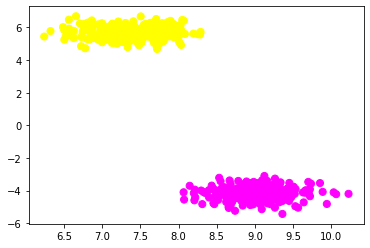

In [12]:
from sklearn.datasets import make_blobs
X, Y = make_blobs(n_samples=500, centers=2,random_state=179, cluster_std=0.40)
plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap='spring')
plt.show()
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2,random_state=179)

In [13]:
clf = svm.SVC(kernel='linear')
clf.fit(X,Y)

SVC(kernel='linear')

In [14]:
clf_predictions = clf.predict(X_test)
print("Accuracy: {}".format(clf.score(X_test, y_test)))

Accuracy: 1.0


No handles with labels found to put in legend.


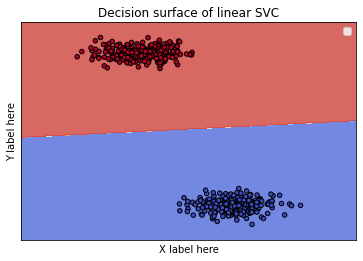

In [15]:
def make_meshgrid(x, y, h=.02):
  x_min, x_max = x.min() - 1, x.max() + 1
  y_min, y_max = y.min() - 1, y.max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
  return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  out = ax.contourf(xx, yy, Z, **params)
  return out
  
fig, ax = plt.subplots()
title = ('Decision surface of linear SVC')
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)
plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=Y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('Y label here')
ax.set_xlabel('X label here')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend()
plt.show()

## **Part 2 : Breast Cancer Prediction Example**

In [16]:
from sklearn import datasets
cancer = datasets.load_breast_cancer()
print("Features: ", cancer.feature_names)
print("Labels: ", cancer.target_names)

Features:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Labels:  ['malignant' 'benign']


In [17]:
cancer.data.shape
print(cancer.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

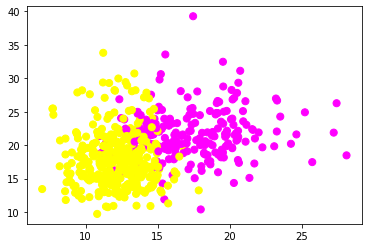

In [18]:
plt.scatter(cancer.data[:, 0], cancer.data[:, 1], c=cancer.target, s=50,cmap='spring')
plt.show()

In [19]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size = 0.2,random_state=179)

In [20]:
clf = svm.SVC(kernel='linear')
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [21]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9649122807017544


In [22]:
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Precision: 0.9583333333333334
Recall: 0.9857142857142858
